In [18]:
import pandas as pd

# Load the dataset
file_p = 'Dataset.csv'
data = pd.read_csv(file_p)

# Check the first few rows of the dataset
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Number of 0 values after replacement:
BALANCE                   0
PURCHASES                 0
ONEOFF_PURCHASES          0
INSTALLMENTS_PURCHASES    0
CASH_ADVANCE              0
CREDIT_LIMIT              0
PAYMENTS                  0
MINIMUM_PAYMENTS          0
dtype: int64


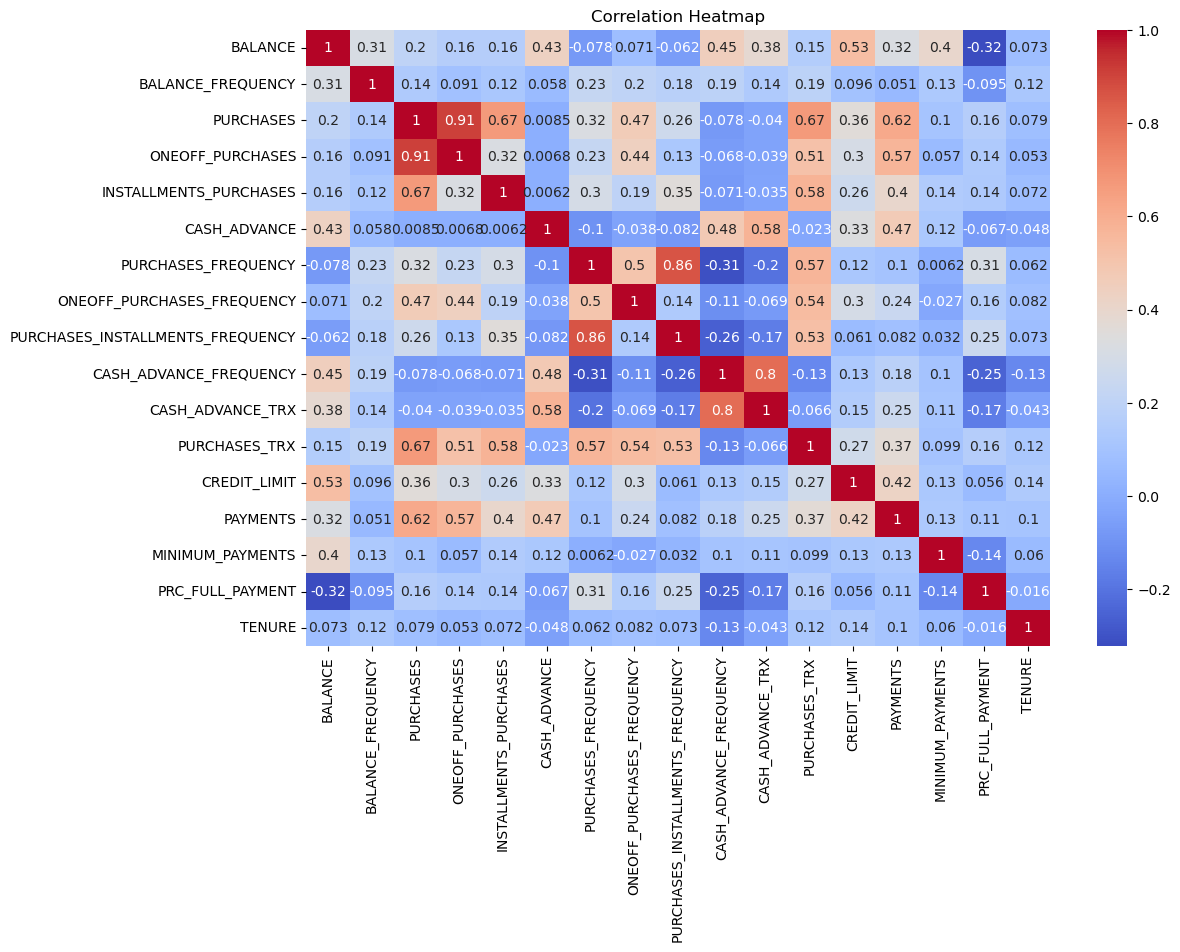

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Define columns where 0 is invalid and should be replaced (for example)
columns_to_fix = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']
# 1. Handle 0 Values
# Replace 0 values with NaN, then impute with median
data[columns_to_fix] = data[columns_to_fix].replace(0, np.nan)
data.fillna(data.median(numeric_only=True), inplace=True)

# Check if any 0 values are still present in those columns
print(f"Number of 0 values after replacement:\n{(data[columns_to_fix] == 0).sum()}")

# 2. Feature Scaling
# Apply StandardScaler for numerical features only (exclude non-numerical like CUST_ID)
numerical_columns = data.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# 3. Feature Engineering (example: total purchases = one-off + installment purchases)
data['TOTAL_PURCHASES'] = data['ONEOFF_PURCHASES'] + data['INSTALLMENTS_PURCHASES']

# 4. Exploratory Data Analysis (EDA)

## 4.1 Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

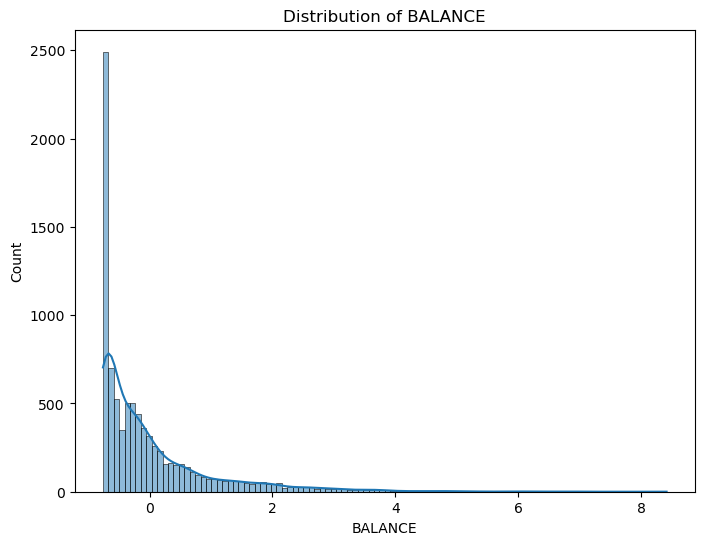

In [20]:
## 4.2 Distribution of BALANCE
plt.figure(figsize=(8, 6))
sns.histplot(data['BALANCE'], kde=True)
plt.title('Distribution of BALANCE')
plt.show()

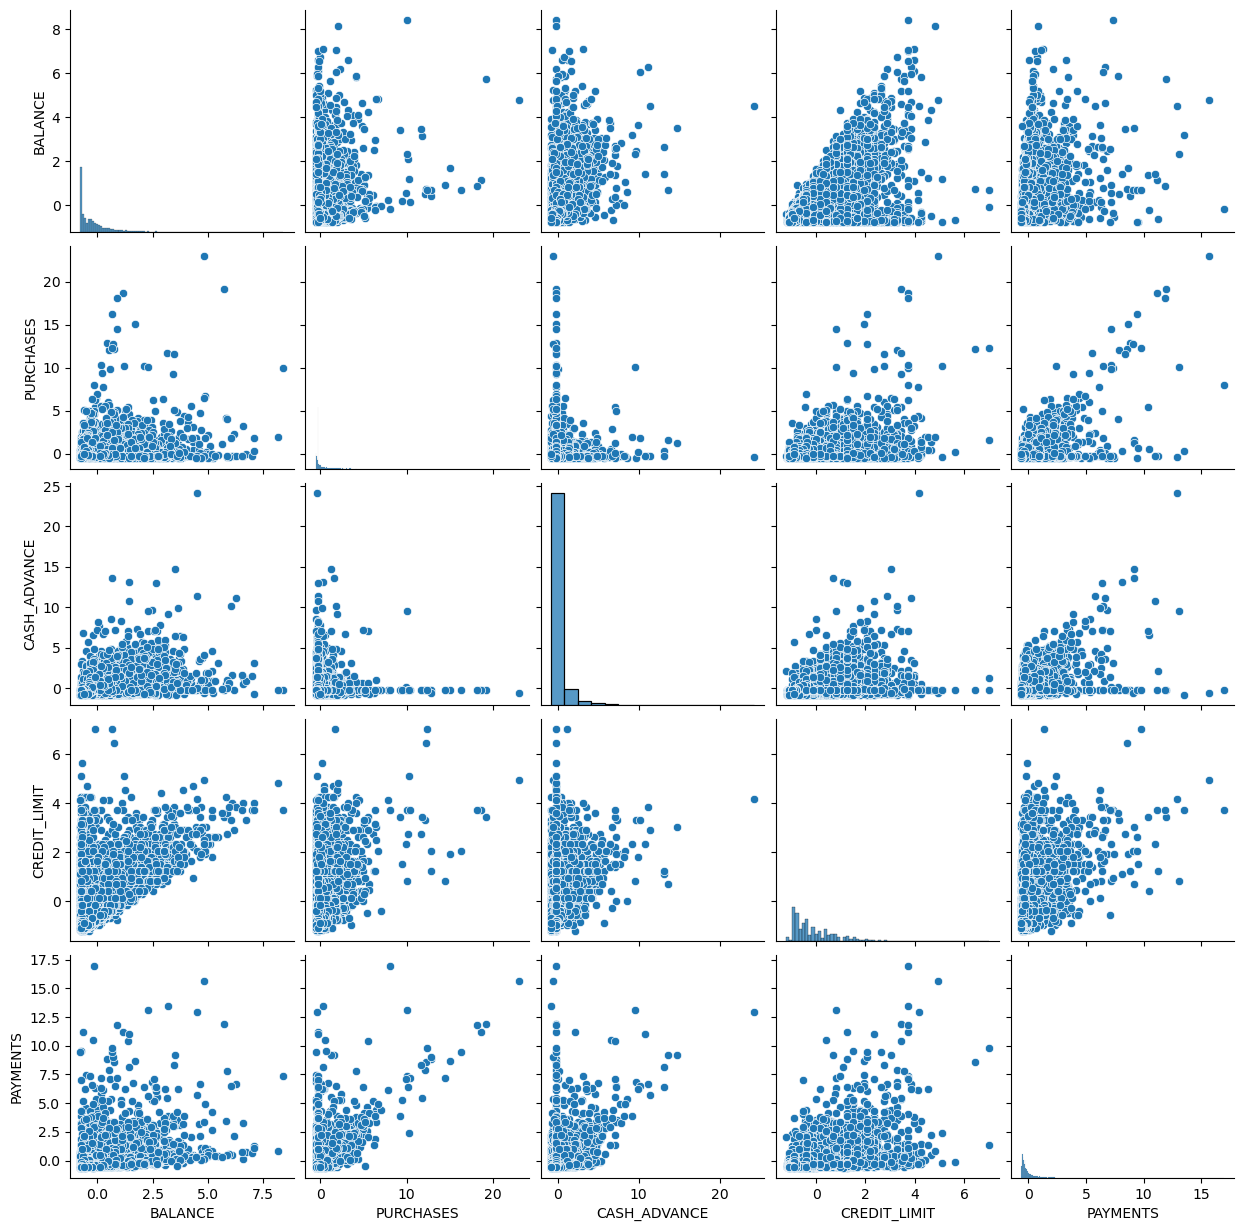

In [21]:
## 4.3 Pairplot for selected features
sns.pairplot(data[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']])
plt.show()

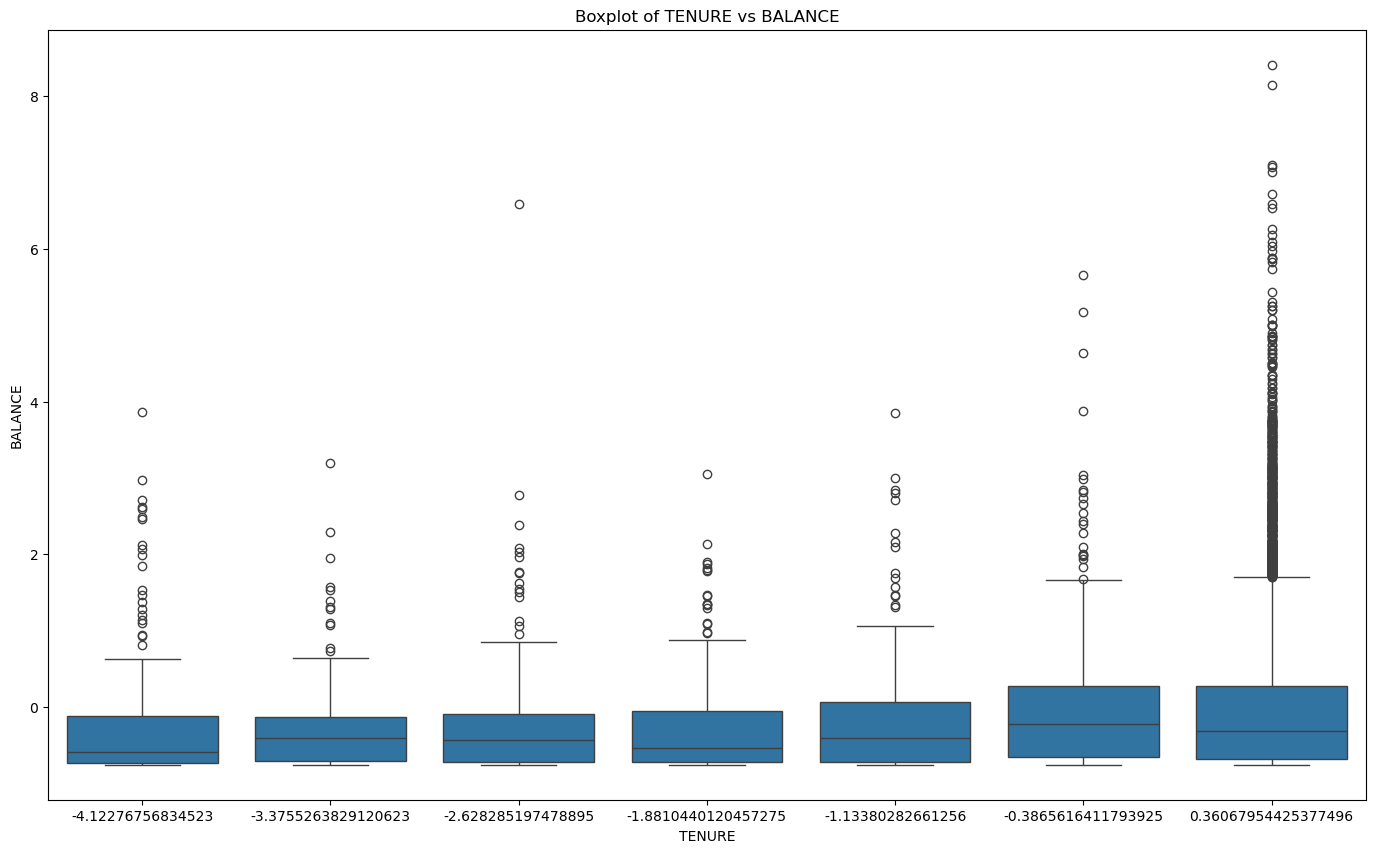

In [22]:
## 4.4 Boxplot of TENURE vs BALANCE
plt.figure(figsize=(17, 10))
sns.boxplot(x='TENURE', y='BALANCE', data=data)
plt.title('Boxplot of TENURE vs BALANCE')
plt.show()

# 5. Insights
# - High correlation between credit limit and balance.
# - The majority of customers have a tenure of 12 months.
# - Distribution of balance shows a right-skewed pattern.
# - Most customers have either very low or high purchases.


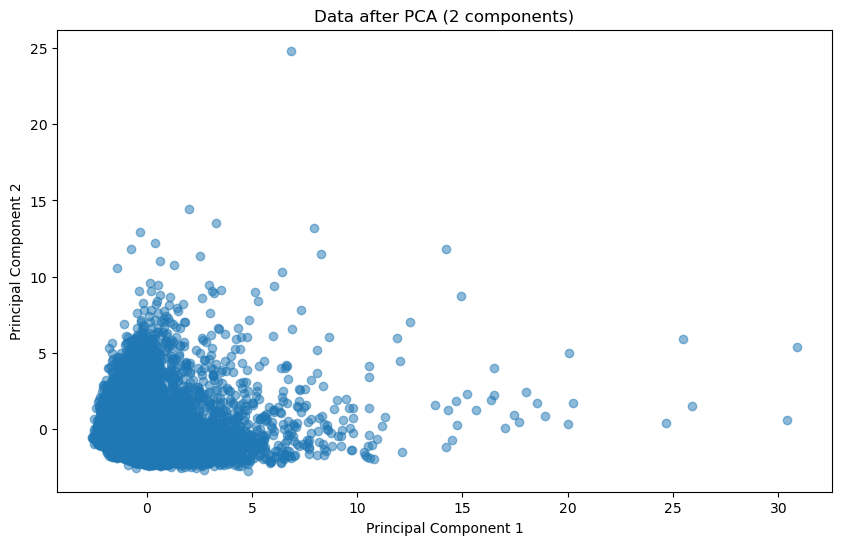

In [24]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

#PCA for Dimensionality Reduction
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_data = pca.fit_transform(data[numerical_columns])

# Visualize the PCA result
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.5)
plt.title('Data after PCA (2 components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


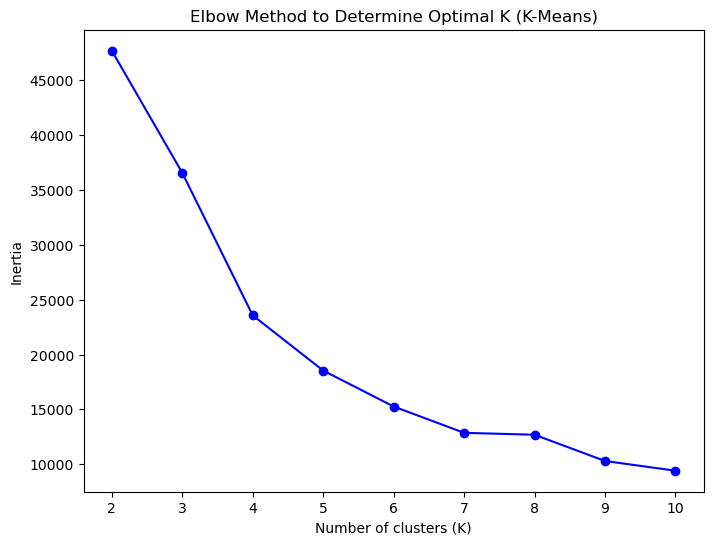

In [25]:
#Apply Clustering Algorithms

# K-Means Clustering
# Determine the optimal number of clusters using the elbow method
inertia = []
range_n_clusters = range(2, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, inertia, 'bo-')
plt.title('Elbow Method to Determine Optimal K (K-Means)')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [26]:
# Apply K-Means with the optimal number of clusters (assuming K=4 from the elbow method)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_data)

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(pca_data)

In [27]:
#Evaluate Clustering Performance

# Silhouette Score for K-Means
silhouette_kmeans = silhouette_score(pca_data, kmeans_labels)
print(f'Silhouette Score for K-Means: {silhouette_kmeans:.4f}')

# Silhouette Score for DBSCAN (if clusters were formed)
if len(set(dbscan_labels)) > 1:
    silhouette_dbscan = silhouette_score(pca_data, dbscan_labels)
    print(f'Silhouette Score for DBSCAN: {silhouette_dbscan:.4f}')
else:
    print('DBSCAN did not form enough clusters for silhouette analysis.')

Silhouette Score for K-Means: 0.4192
Silhouette Score for DBSCAN: 0.6010


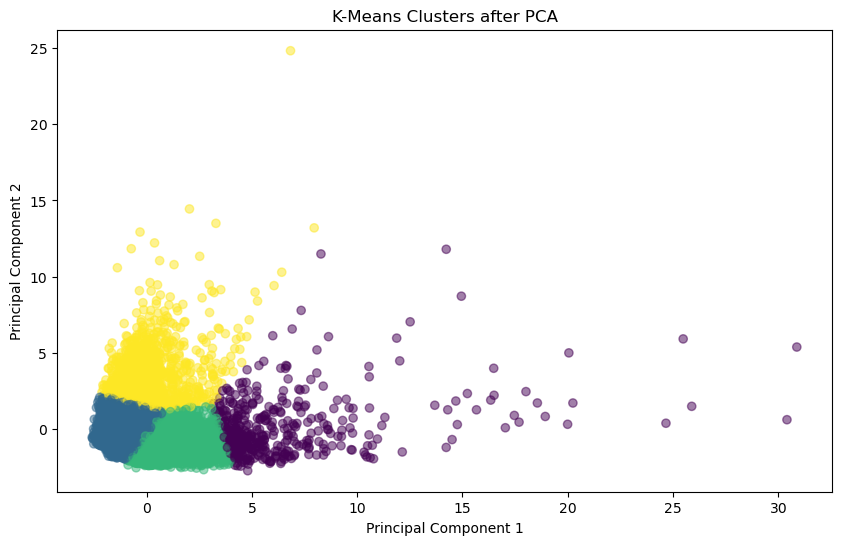

In [28]:
#Visualize the Clusters

# Visualize K-Means Clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title('K-Means Clusters after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


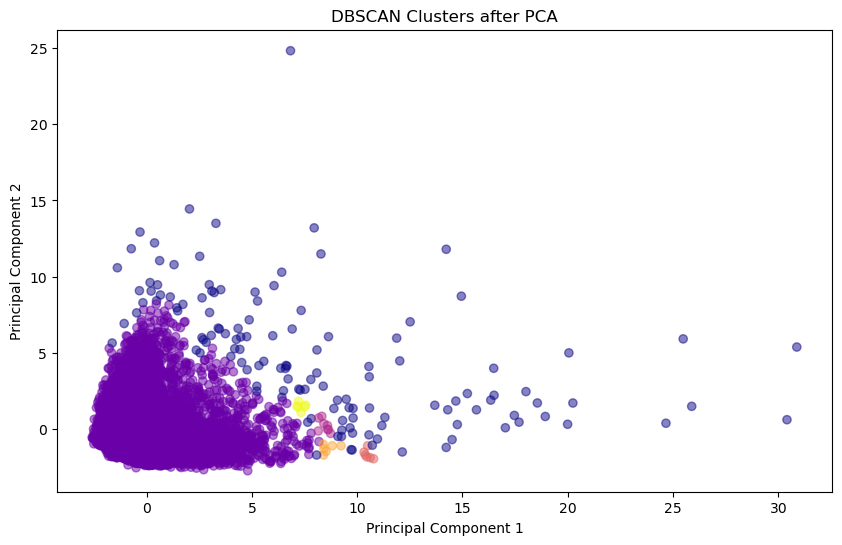

In [29]:
# Visualize DBSCAN Clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan_labels, cmap='plasma', alpha=0.5)
plt.title('DBSCAN Clusters after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [31]:

data['Cluster'] = kmeans_labels

# 1. Filter only numerical columns (exclude non-numerical columns like CUST_ID)
numerical_columns = data.select_dtypes(include=[np.number]).columns

# 2. Cluster Profiling: Get mean values of numerical features by cluster
cluster_profile = data.groupby('Cluster')[numerical_columns].mean()

# Display cluster profile (mean values for each feature within each cluster)
print("Cluster Profiles (Means):")
print(cluster_profile)

# 3. Detailed Descriptions of Each Segment
for cluster_num in range(cluster_profile.shape[0]):
    print(f"\n### Cluster {cluster_num} Profile ###")
    print(cluster_profile.iloc[cluster_num])
    
    # Propose a marketing strategy based on key characteristics of the cluster
    if cluster_num == 0:
        print("\n**Marketing Strategy for Cluster 0**:")
        print("This cluster has high balances and credit limits but low purchases. Focus on promotions that encourage spending through personalized discounts or cashback offers. Promote financial products like savings plans or low-interest rate loans.")
    
    elif cluster_num == 1:
        print("\n**Marketing Strategy for Cluster 1**:")
        print("This group has moderate balances and purchases. They are likely moderate spenders. Provide loyalty programs or rewards to encourage more frequent spending and higher credit usage.")
    
    elif cluster_num == 2:
        print("\n**Marketing Strategy for Cluster 2**:")
        print("This cluster has low credit limits but high purchases. They may be constrained by their credit limits. Consider offering credit limit increases or balance transfer offers to retain these high spenders.")
    
    elif cluster_num == 3:
        print("\n**Marketing Strategy for Cluster 3**:")
        print("This group has low balances, purchases, and credit limits. They are more likely to be new or cautious users. Use educational campaigns and low-risk products to encourage them to use credit responsibly and build long-term customer relationships.")


Cluster Profiles (Means):
          BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                             
0        0.976770           0.465029   3.030686          2.574559   
1       -0.267662          -0.315846  -0.327317         -0.235928   
2       -0.335062           0.232217   0.107716          0.029970   
3        1.448513           0.366033  -0.187015         -0.152382   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                      2.347599      0.048561             1.152663   
1                     -0.292228     -0.257858            -0.661577   
2                      0.147245     -0.246374             0.993071   
3                     -0.169275      1.518238            -0.577488   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                          

Cluster Profiling and Insights:

Cluster 0:
High balances but low purchases.
Marketing Strategy: Focus on encouraging spending. Offer personalized discounts, cashback, or loyalty rewards. Financial products like low-interest loans or savings schemes could be appealing.

Cluster 1:
Moderate balances and purchases.
Marketing Strategy: These are average spenders. Promote loyalty programs, exclusive offers, and rewards that incentivize frequent use of credit or purchases. Engage with this segment to convert them into higher spenders.

Cluster 2:
Low credit limit but high purchases.
Marketing Strategy: These customers are likely restricted by their credit limits. Offer credit limit increases, balance transfer options, or customized offers based on their high spending habits. They have the potential to become premium users.

Cluster 3:
Low balances, purchases, and credit limits.
Marketing Strategy: Likely new or cautious users. Educate them on credit use and provide entry-level financial products. You can offer small rewards for engaging more with credit or financial products. They need nurturing to become long-term, high-value customers.